# The Complete Machine Learning

## Regresión

In [24]:
from sklearn.datasets import fetch_california_housing
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

california = fetch_california_housing(as_frame=True)
df = california.frame
X = df[['MedInc']]
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Análisis de Correlación
El análisis de correlación mide la relación entre variables numéricas.

* Valores cercanos a +1 → relación positiva
* Valores cercanos a –1 → relación negativa
* Valores cercanos a 0 → sin relación


<Axes: >

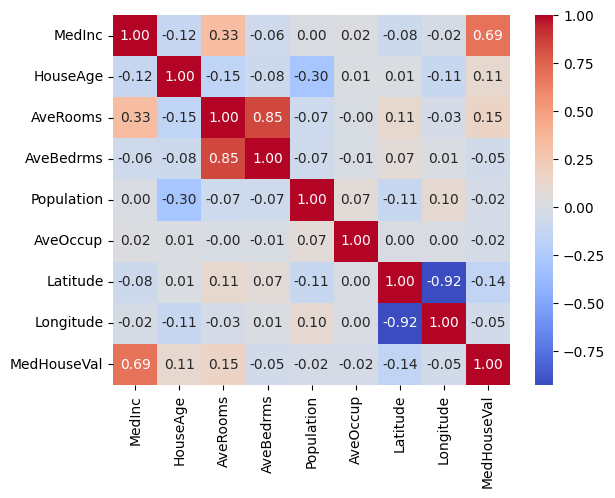

In [25]:
df.corr()                # Calcula la correlación entre columnas numéricas
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm') # Muestra un mapa de calor de esas correlaciones


### Recta de regresión
La recta de regresión muestra cómo una variable depende de otra.
Tiene la forma:

y = a + b * x

* a = intercepto (valor de y cuando x=0)
* b = pendiente (cuánto cambia y por cada unidad de x)

📈 La línea representa la tendencia entre las variables (predice y a partir de x).


<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

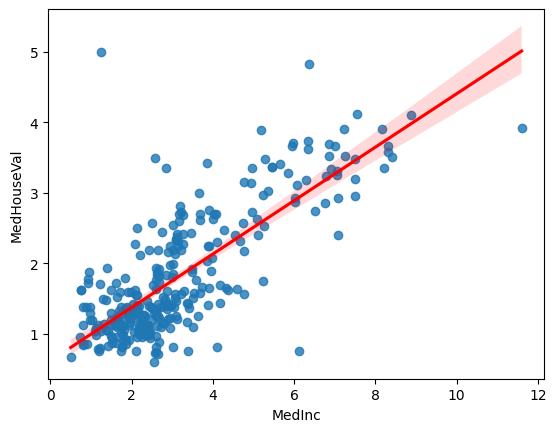

In [26]:
sns.regplot(x='MedInc', y='MedHouseVal', data=df[1:300], line_kws={'color': 'red'})

### Regresión Robusta
RANSAC (Random Sample Consensus)

* **Qué es: regresión** robusta que ignora outliers y busca la recta que mejor se ajusta a la mayoría de los datos.
* **Cómo funciona:** selecciona subconjuntos aleatorios, ajusta un modelo, cuenta los puntos que encajan bien (inliers) y repite para quedarse con el mejor.


In [27]:
from sklearn.linear_model import RANSACRegressor

modelo = RANSACRegressor()
modelo.fit(X_train, y_train) 
y_pred= modelo.predict(X_test) 
y_pred


array([1.00716184, 1.23214166, 1.48324253, ..., 3.0049064 , 1.29928362,
       1.5022974 ])

### Evaluación del Rendimiento del Modelo de Regresión

#### 1. Análisis de Residuos

* **Qué es:** Evalúa la calidad del modelo analizando los errores (residuos).
* **Sirve para:** detectar outliers, patrones no lineales o heterocedasticidad.
* **Interpretación:**
    * Residuos aleatorios → buen ajuste
    * Patrón visible → modelo mejorable
    * Puntos muy lejanos a 0 → posibles outliers


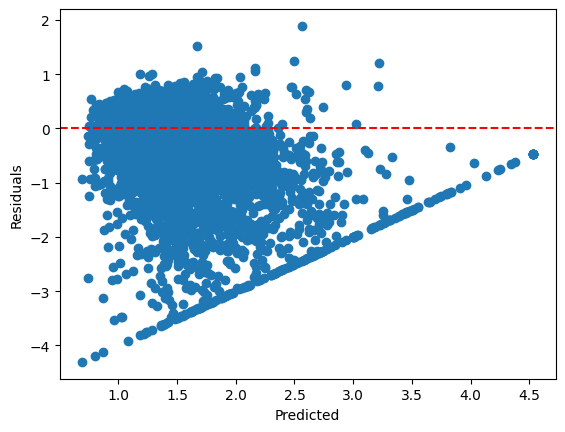

In [28]:
plt.scatter(y_pred, y_pred - y_test)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

#### 2. Error cuadrático medio (MSE – Mean Squared Error)
* **Qué es:**  Promedio de los cuadrados de los errores (residuos).
* **Sirve para:** medir cuánto se alejan las predicciones de los valores reales.
* **Interpretación:**
    * MSE bajo → buen ajuste
    * MSE alto → modelo con errores grandes



In [29]:
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(y_test, y_pred)
mse_test 
# El MSE es muy alto (~0.89) porque el error promedio 
# del modelo es de unos $94000.
#
# Esto se debe a que el modelo es demasiado simple:
# 1. Solo usa una variable (el ingreso).
# 2. Ignora factores clave (ubicación, habitaciones).
# 3. Falla al predecir el tope de precio artificial 
#    de $500k del dataset.

1.0155300347825216

#### 3. Coeficiente de determinación (R²)
* **Qué es:** Mide la proporción de variabilidad de y explicada por el modelo.
* **Interpretación:**
    * ( R^2 = 1 ) → el modelo explica todos los datos
    * ( R^2 = 0 ) → el modelo no explica nada
    * ( R^2 < 0 ) → peor que predecir la media

In [30]:
r2_test = modelo.score(X_test, y_test)
r2_test

0.22502817696977717

### Regresión Múltiple

* **Qué es:** Una extensión de la regresión lineal simple. Predice una variable dependiente ($y$) usando **múltiples** variables independientes (features) ($x_1, x_2, x_3, \dots$).
* **Forma:** La ecuación se expande para incluir un coeficiente (una pendiente) por cada variable.
    $$ y = a + b_1 x_1 + b_2 x_2 + \dots + b_n x_n $$
    * $a$: Intercepto (valor de $y$ cuando todas las $x$ son 0).
    * $b_1$: Cuánto cambia $y$ por cada unidad de $x_1$, *manteniendo constantes las demás variables*.
    * $b_2$: Cuánto cambia $y$ por cada unidad de $x_2$, *manteniendo constantes las demás variables*.
* **Sirve para:** Modelar relaciones más realistas y complejas donde el resultado depende de varios factores a la vez.
    * *Ejemplo*: Predecir el `precio_casa` basándose en `metros_cuadrados`, `num_habitaciones` y `antigüedad`.


In [31]:
from sklearn.linear_model import LinearRegression
X = df[['MedInc', 'AveRooms']] 
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_multiple = LinearRegression()
modelo_multiple.fit(X_train, y_train)
                    
print(f"Intercepto (a): {modelo_multiple.intercept_:.2f}")

print(f"Coeficientes (b1, b2): {modelo_multiple.coef_}")
print(f"  - Coeficiente para 'MedInc': {modelo_multiple.coef_[0]:.2f}")
print(f"  - Coeficiente para 'AveRooms': {modelo_multiple.coef_[1]:.2f}")


# Predecimos todos los valores del set de prueba
y_pred_test = modelo_multiple.predict(X_test)

r2_test = modelo_multiple.score(X_test, y_test)
print(f"R² (Test): {r2_test:.4f}")

mse_test = mean_squared_error(y_test, y_pred_test)
print(f"MSE (Test): {mse_test:.2f}")



Intercepto (a): 0.60
Coeficientes (b1, b2): [ 0.43626089 -0.04017161]
  - Coeficiente para 'MedInc': 0.44
  - Coeficiente para 'AveRooms': -0.04
R² (Test): 0.4642
MSE (Test): 0.70


### Mínimos Cuadrados Ordinarios (OLS) vs. Gradiente Descendente

Estos no son *tipos* de regresión, sino los **algoritmos** que se usan para *encontrar* los mejores coeficientes ($a$ y $b$) del modelo.


### Mínimos Cuadrados Ordinarios (Ordinary Least Squares - OLS)

* **Qué es:** Es un método matemático **directo** para encontrar la *única* recta que mejor se ajusta a los datos.
* **Cómo funciona:** OLS encuentra los valores de $a$ (intercepto) y $b$ (pendiente) que **minimizan la suma de los cuadrados de los errores** (los residuos). 
* **Enfoque:** Es una **solución analítica (exacta)**. Resuelve un conjunto de ecuaciones para encontrar los coeficientes óptimos de una sola vez.
* **Ventajas:**
    * Es rápido y eficiente para conjuntos de datos pequeños o medianos.
    * Es determinista: siempre da exactamente la misma respuesta.
* **Desventajas:**
    * Requiere cargar todos los datos en memoria. Puede ser computacionalmente muy costoso (o imposible) si tienes millones de variables o muestras.


In [32]:
import statsmodels.api as sm

X_con_constante = sm.add_constant(X)

modelo_ols = sm.OLS(y, X_con_constante).fit()

# Muestra la tabla de resumen completa (R², p-values, coef...)
print(modelo_ols.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     9502.
Date:                Mon, 27 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:19:15   Log-Likelihood:                -25505.
No. Observations:               20640   AIC:                         5.102e+04
Df Residuals:                   20637   BIC:                         5.104e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5950      0.016     36.836      0.0

### Gradiente Descendente (Gradient Descent - GD)

* **Qué es:** Es un algoritmo de optimización **iterativo** (paso a paso) usado para encontrar el mínimo de una función (en este caso, minimizar el error MSE).
* **Cómo funciona (Analogía):** Imagina que estás en una montaña en medio de la niebla (`Función de Error`) y quieres llegar al valle (`Error Mínimo`).
1.  Empiezas en un punto aleatorio (coeficientes $a$ y $b$ aleatorios).
2.  Miras a tu alrededor y determinas la dirección de máxima pendiente hacia abajo (el "gradiente"). 
3.  Das un pequeño "paso" en esa dirección (actualizas $a$ y $b$ ligeramente).
4.  Repites los pasos 2 y 3 muchas veces (`iteraciones`).
5.  Eventualmente, llegas al fondo del valle (los coeficientes convergen al valor óptimo).
* **Hiperparámetro clave (Learning Rate):** Controla el *tamaño del paso* que das.
* **Rate pequeño:** Tarda mucho en converger.
* **Rate grande:** Puede "saltarse" el mínimo y nunca converger.
* **Ventajas:**
* Es la base de casi todo el Machine Learning moderno (Redes Neuronales, Deep Learning).
* Funciona con **conjuntos de datos masivos** (Big Data) porque no necesita todos los datos a la vez (puede usar variantes como *Stochastic Gradient Descent - SGD*).

   

In [33]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

modelo_sgd = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.1)

modelo_sgd.fit(X_scaled, y)
print(f"Coeficientes encontrados por SGD: {modelo_sgd.coef_}")

Coeficientes encontrados por SGD: [ 0.52126544 -0.77612646]


### Métodos de Regularización para Regresión

* **Qué son:** Son técnicas que modifican la regresión lineal (OLS) para **prevenir el sobreajuste (overfitting)** y mejorar el rendimiento del modelo en datos nuevos.
* **El Problema que Resuelven:**
    1.  **Sobreajuste:** Un modelo normal (OLS) puede volverse demasiado complejo si tiene muchas variables (features). Aprende "de memoria" el ruido de los datos de entrenamiento y falla estrepitosamente en datos nuevos.
    2.  **Multicolinealidad:** Cuando dos o más variables independientes (ej. `m2_construidos` y `m2_totales`) están muy correlacionadas, el modelo OLS se vuelve inestable y sus coeficientes ($b$) pueden dispararse a valores absurdos.
* **Cómo funcionan (La Solución):** La regularización introduce una **"penalización"** en el modelo. Le dice al algoritmo que, además de minimizar el error (MSE), también debe mantener los coeficientes ($b$) **lo más pequeños posible**.
    * Es una "correa" (leash) que impide que los coeficientes crezcan sin control.
* **¡IMPORTANTE!** Todos los métodos de regularización requieren que los datos estén **escalados** (ej. usando `StandardScaler`). Si una variable va de 0 a 1,000,000 y otra de 0 a 10, la penalización afectaría de forma injusta a la variable con la escala mayor.

#### 1. Regresión Ridge (Regularización L2)

* **Qué es:** El método de regularización más común.
* **Cómo funciona:** Añade una penalización proporcional a la **suma del *cuadrado*** de los coeficientes.
    $$\text{Costo} = \text{MSE} + \alpha \sum b_i^2$$
* **El Hiperparámetro Clave: `alpha`**
    * `alpha` controla la *fuerza* de la penalización (la "tensión" de la correa).
    * `alpha = 0`: Es una Regresión Lineal normal (OLS).
    * `alpha` (pequeño): Poca penalización.
    * `alpha` (grande): Mucha penalización. Los coeficientes se "encogen" (shrinkage) mucho, forzando un modelo más simple (riesgo de *underfitting*).
* **Resultado:** Reduce el tamaño de *todos* los coeficientes, pero **nunca los elimina** (no los hace exactamente cero). Es excelente para manejar la multicolinealidad.


In [34]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Crear y entrenar el modelo
# 'alpha=1.0' es un valor por defecto, se suele ajustar
modelo_ridge = Ridge(alpha=1.0)
modelo_ridge.fit(X_scaled, y)

print(f"Coeficientes de Ridge: {modelo_ridge.coef_}")

Coeficientes de Ridge: [ 0.82476594 -0.09427023]


#### 2. Regresión LASSO (Regularización L1)

* **Qué es:** *L*east *A*bsolute *S*hrinkage and *S*election *O*perator.
* **Cómo funciona:** Añade una penalización proporcional a la **suma del *valor absoluto*** de los coeficientes.
    $$\text{Costo} = \text{MSE} + \alpha \sum |b_i|$$
* **El Hiperparámetro Clave: `alpha`**
    * Funciona igual que en Ridge: controla la fuerza de la penalización.
* **Resultado (La Gran Diferencia):** LASSO es más "agresivo". Su penalización **puede forzar a que los coeficientes de las variables menos importantes se vuelvan *exactamente cero***. 
* **Sirve para:** Realizar **Selección de Variables (Feature Selection)** automática. "Apaga" las variables que no aportan valor, simplificando el modelo.


In [35]:
from sklearn.linear_model import Lasso

# 1. Usar los mismos datos escalados (X_scaled)

# 2. Crear y entrenar el modelo
# 'alpha=0.1' (el valor óptimo suele ser diferente al de Ridge)
modelo_lasso = Lasso(alpha=0.1)
modelo_lasso.fit(X_scaled, y)

# Al imprimir, veremos que algunos coeficientes son 0.0
print(f"Coeficientes de LASSO: {modelo_lasso.coef_}")

Coeficientes de LASSO: [ 0.69398939 -0.        ]



#### 3. Elastic Net

* **Qué es:** Un modelo que **combina las penalizaciones L1 (LASSO) y L2 (Ridge)**. Es el "lo mejor de los dos mundos".
* **Cómo funciona:** Permite tener selección de variables (como LASSO) pero es más estable si hay alta multicolinealidad (como Ridge).
* **Hiperparámetros Clave:**
    * `alpha`: La fuerza *total* de la penalización (combinada).
    * `l1_ratio`: El *porcentaje de mezcla* entre L1 y L2.
        * `l1_ratio = 1`: Es 100% LASSO.
        * `l1_ratio = 0`: Es 100% Ridge.
        * `l1_ratio = 0.5`: Es una mezcla 50/50.
* **Sirve para:** Es una opción muy robusta y a menudo la preferida cuando no estás seguro de cuál (Ridge o LASSO) funcionará mejor.


In [36]:
from sklearn.linear_model import ElasticNet

# 1. Usar los mismos datos escalados (X_scaled)

# 2. Crear y entrenar el modelo
# alpha = fuerza total; l1_ratio = mezcla
modelo_elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
modelo_elastic.fit(X_scaled, y)

print(f"Coeficientes de ElasticNet: {modelo_elastic.coef_}")

Coeficientes de ElasticNet: [ 0.71062398 -0.00663078]


### Regresión Polinómica

* **Qué es:** Una forma de adaptar la Regresión Lineal para que pueda modelar **relaciones curvas (no lineales)**.
* **Cómo funciona:** Es un truco ingenioso. El modelo sigue siendo una "Regresión Lineal Múltiple" en su núcleo, pero en lugar de usar solo la variable $x$, creamos **nuevas variables** (features) que son potencias de $x$ (como $x^2$, $x^3$, etc.).
* **Forma (ej. grado 2, cuadrática):**
    $$y = a + b_1 x + b_2 x^2$$
    El modelo encuentra los mejores coeficientes $a$, $b_1$ y $b_2$ para ajustar una **parábola** a los datos. 
* **Riesgo ⚠️:** El **Sobreajuste (Overfitting)**. Si usas un grado muy alto (ej. `grado=15`), el modelo intentará pasar *exactamente* por todos los puntos de entrenamiento, creando una curva rídicula que fallará por completo en datos nuevos. 


In [37]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np

# 1. Definir el grado de la curva
grado = 3 # Cúbica

# 2. Crear un 'pipeline'
# Este pipeline hará dos cosas en orden:
# 1. PolynomialFeatures: Transforma [x] en [1, x, x^2, x^3]
# 2. LinearRegression: Ajusta un modelo lineal a esas nuevas variables
modelo_poly = make_pipeline(PolynomialFeatures(grado), LinearRegression())

# 3. Entrenar el modelo
# 'X' debe ser un array 2D, ej: X_train[['horas_estudio']]
modelo_poly.fit(X_train, y_train)

# 4. Predecir (el pipeline transforma los datos nuevos automáticamente)
y_pred = modelo_poly.predict(X_test)


### Modelos No Lineales (Basados en Árboles)

A diferencia de la Regresión Polinómica (que busca *una sola fórmula* curva), los modelos de árbol dividen el problema en "trozos" más pequeños. Son **no paramétricos**: no asumen ninguna forma matemática de antemano.

##### Árbol de Decisión (para Regresión)

* **Qué es:** Un modelo que divide los datos con preguntas simples (ej. `¿x < 5?`).
* **Predicción:** La **media** de `y` en la región (hoja) final.
* **Riesgo:** Tiende al **sobreajuste** (overfitting).
* **Código:**
    ```python
    from sklearn.tree import DecisionTreeRegressor
    modelo_arbol = DecisionTreeRegressor(max_depth=3)
    ```


##### Random Forest (para Regresión)

* **Qué es:** Un ensamble que **promedia** las predicciones de **muchos árboles** (`n_estimators`).
* **Resultado:** Soluciona el sobreajuste del árbol individual.
* **Código:**
    ```python
    from sklearn.ensemble import RandomForestRegressor
    modelo_rf = RandomForestRegressor(n_estimators=100)
    ```


##### AdaBoost (para Regresión)

* **Qué es:** Un ensamble **secuencial** (boosting).
* **Cómo funciona:** Cada árbol nuevo se entrena para **corregir los errores** del anterior.
* **Código:**
    ```python
    from sklearn.ensemble import AdaBoostRegressor
    modelo_ada = AdaBoostRegressor(n_estimators=50)
    ```
   

### Preprocesamiento de Datos (Data Pre-Processing)

* **Qué es:** El conjunto de técnicas para limpiar, transformar y preparar los datos brutos *antes* de entrenar un modelo.
* **Por qué es crucial (Garbage In, Garbage Out 🗑️):** La calidad del modelo depende *directamente* de la calidad de los datos. La mayoría de los algoritmos matemáticos no pueden manejar valores faltantes, texto o variables en escalas muy dispares.

---

### Escalado de Variables (Scaling)

* **Qué es:** Ajustar el rango o la distribución de las variables numéricas (columnas).
* **Por qué es necesario:** Muchos algoritmos (SVM, Regresión Logística, Redes Neuronales, Gradiente Descendente, KNN) son sensibles a las escalas.
    * *Ejemplo:* Una variable `edad` (rango 18-80) y una variable `salario` (rango 20.000-100.000). El salario dominaría completamente el modelo solo por su escala, aunque la edad sea igual de importante.
* **Nota:** Los modelos basados en árboles (Decision Tree, Random Forest) generalmente **no** necesitan escalado.

---

#### 1. Estandarización (Standardization)
*(Cubre `Standarization`, `Mean Removal` y `Variance Scaling`)*

* **Qué es:** Transforma los datos para que tengan una **media ($\mu$) de 0** (`Mean Removal`) y una **desviación estándar ($\sigma$) de 1** (`Variance Scaling`). Se le llama comúnmente **Z-score**.
* **Fórmula:** $z = \frac{x - \mu}{\sigma}$
* **Cuándo usarlo:** Es el método de escalado más común y robusto. Es la opción por defecto casi siempre, especialmente si los datos siguen una distribución normal (Campana de Gauss).


In [38]:
from sklearn.preprocessing import StandardScaler

# 1. Crear el escalador
scaler = StandardScaler()

# 2. 'fit' aprende la media (μ) y la desv. (σ) SOLO de los datos de ENTRENAMIENTO
scaler.fit(X_train)

# 3. 'transform' aplica la fórmula (x - μ) / σ a ambos sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) # Usamos la μ y σ del train!

# X_train_scaled = scaler.fit_transform(X_train)
print(f"Train: {X_train}")
print(f"Train Scaled: {X_train_scaled}")

Train:        MedInc  AveRooms
14196  3.2596  5.017657
8267   3.8125  4.473545
17445  4.1563  5.645833
14265  1.9425  4.002817
2271   3.5542  6.268421
...       ...       ...
11284  6.3700  6.129032
11964  3.0500  6.868597
5390   2.9344  3.986717
860    5.7192  6.395349
15795  2.5755  3.402576

[16512 rows x 2 columns]
Train Scaled: [[-0.326196   -0.17491646]
 [-0.03584338 -0.40283542]
 [ 0.14470145  0.08821601]
 ...
 [-0.49697313 -0.60675918]
 [ 0.96545045  0.40217517]
 [-0.68544764 -0.85144571]]


#### 2. Escalador Min-Max (MinMaxScaler)

* **Qué es:** Transforma los datos para que quepan exactamente en un rango específico, comúnmente **[0, 1]**.
* **Fórmula:** $x_{scaled} = \frac{x - \min(x)}{\max(x) - \min(x)}$
* **Cuándo usarlo:** Útil cuando se necesita un rango fijo (ej. procesamiento de imágenes, donde los píxeles van de 0 a 255) o si el algoritmo requiere datos en un rango positivo.
* **Desventaja:** 🚨 Es **muy sensible a outliers** (valores atípicos). Un solo valor extremo puede "aplastar" todos los demás datos en un rango muy pequeño (ej. 0.01 - 0.03).


In [39]:
from sklearn.preprocessing import MinMaxScaler

# feature_range=(0, 1) es el valor por defecto
minmax_scaler = MinMaxScaler()

X_train_scaled = minmax_scaler.fit_transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)

#### 3. Escalador de Máximo Absoluto (MaxAbsScaler)
*(Cubre `Scaling sparse data`)*

* **Qué es:** Escala los datos dividiendo por el valor absoluto máximo de la columna. El rango resultante siempre estará entre **[-1, 1]**.
* **Diferencia clave:** **No centra los datos** (no resta la media).
* **Cuándo usarlo:** Es la opción recomendada para **datos dispersos (sparse data)**, (ej. matrices de conteo de palabras en NLP). Al no restar la media, **preserva los ceros**, lo cual es fundamental en datos *sparse*.


In [41]:
from sklearn.preprocessing import MaxAbsScaler

X_np = X.to_numpy() # Convertir DataFrame a NumPy si es necesario

maxabs_scaler = MaxAbsScaler()

X_scaled_maxabs = maxabs_scaler.fit_transform(X_np)
print("Datos escalados con MaxAbsScaler (primeras 5 filas):\n", X_scaled_maxabs[:5])

Datos escalados con MaxAbsScaler (primeras 5 filas):
 [[0.55500963 0.0492155 ]
 [0.55342298 0.04395869]
 [0.48382344 0.05840454]
 [0.37620416 0.04099351]
 [0.25641162 0.04426674]]


#### 4. Escalado vs Blanqueamiento (Scaling vs Whitening)

* **Escalado (Scaling):** (Lo que vimos: StandardScaler, MinMaxScaler). Ajusta el rango/distribución de *cada variable (columna) independientemente* de las demás.
* **Blanqueamiento (Whitening):** Es un preprocesamiento más avanzado (ej. usando PCA). No solo escala los datos (media 0, varianza 1), sino que también **elimina la correlación (multicolinealidad)** entre las variables. Es menos común y más costoso computacionalmente.


### Normalización (Normalization)

* **¡CUIDADO!** En Scikit-learn, "Normalización" es **diferente** de "Escalado" (Standardization/MinMax).
* **Qué es:** La normalización **escala cada *FILA* (muestra) individualmente**, no cada *COLUMNA* (variable).
* **Cómo funciona:** Escala cada fila (vector de datos de una muestra) para que tenga una **longitud unitaria** (norma L1 o L2 igual a 1).
* **Cuándo usarlo:** Útil en algoritmos que miden "distancias" o "similitud" entre muestras (ej. K-Nearest Neighbors, Clustering) o en procesamiento de texto (para medir similitud de coseno en TF-IDF). No se usa en Regresión o SVM.


In [43]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer(norm='l2')
# Aplicar a los valores NumPy de X_train
X_normalized_rows = normalizer.transform(X_train.values)
print("Datos normalizados por fila (primeras 5 filas):\n", X_normalized_rows[:5])

Datos normalizados por fila (primeras 5 filas):
 [[0.54476784 0.83858691]
 [0.64863428 0.76110023]
 [0.59284882 0.80531377]
 [0.43659017 0.8996605 ]
 [0.4932326  0.86989747]]


### Binarización (Binarization)

* **Qué es:** Convierte variables numéricas continuas en valores binarios (0 o 1) basándose en un **umbral (threshold)**.
* **Sirve para:** Simplificar una variable (ej. convertir `nota` en `¿aprobado?` si `nota >= 5.0`).


In [ ]:
from sklearn.preprocessing import Binarizer

X_notas = [[4], [8], [5], [3], [6]]

# Todo <= 5.0 se vuelve 0, todo > 5.0 se vuelve 1
binarizer = Binarizer(threshold=5.0)
X_binarized = binarizer.fit_transform(X_notas)
# Resultado: [[0], [1], [0], [0], [1]]
X_binarized

array([[0],
       [1],
       [0],
       [0],
       [1]])

### Codificación de variables categóricas (Encoding categorical features)

* **Qué es:** Convertir variables de texto (categorías) en números, ya que los modelos matemáticos no entienden texto (ej. `['Rojo', 'Verde', 'Azul']`).

#### 1. Codificación One-Hot (One-Hot Encoding / One-of-K)

* **Qué es:** Es la técnica estándar para codificar categorías **nominales** (donde no hay un orden, ej. "País", "Color").
* **Cómo funciona:** Crea **nuevas columnas binarias (0/1)** (llamadas *dummy variables*) para *cada* categoría presente.
* **Ejemplo:**
    * Variable `Color`: ['Rojo', 'Verde', 'Rojo', 'Azul']
    * Se convierte en 3 columnas:
        * `Color_Rojo`: [1, 0, 1, 0]
        * `Color_Verde`: [0, 1, 0, 0]
        * `Color_Azul`: [0, 0, 0, 1]

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# DataFrame de ejemplo (puede ser el mismo de la celda de Pandas)
df_cat_example = pd.DataFrame({'Color': ['Rojo', 'Verde', 'Rojo', 'Azul', 'Verde'],
                             'Talla': ['M', 'L', 'M', 'S', 'L']})

# Separar características (X) y objetivo (y) si tuvieras uno
X_cat = df_cat_example[['Color', 'Talla']]
# y_cat = ... (si tuvieras una variable objetivo)

# Dividir los datos categóricos
X_train_cat, X_test_cat = train_test_split(X_cat, test_size=0.2, random_state=42)

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Ajustar y transformar en entrenamiento
X_train_ohe = ohe.fit_transform(X_train_cat)
# Solo transformar en prueba (usando el ajuste del entrenamiento)
X_test_ohe = ohe.transform(X_test_cat)

print("Categorías encontradas:", ohe.categories_)
print("Datos de entrenamiento codificados (primeras filas):\n", X_train_ohe[:3])
print("Datos de prueba codificados (primeras filas):\n", X_test_ohe[:2])

Categorías encontradas: [array(['Azul', 'Rojo', 'Verde'], dtype=object), array(['L', 'M', 'S'], dtype=object)]
Datos de entrenamiento codificados (primeras filas):
 [[0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0.]]
Datos de prueba codificados (primeras filas):
 [[0. 0. 1. 1. 0. 0.]]


### Evaluación y Validación de Modelos

Una vez que tenemos un modelo (Regresión, Árbol, etc.), ¿cómo sabemos si es "bueno"? ¿Cómo evitamos el sobreajuste y elegimos los mejores hiperparámetros (ej. el `alpha` de Ridge o la `max_depth` de un árbol)?


### Compensación Sesgo-Varianza (Bias-Variance Tradeoff)

* **Qué es:** Es el dilema fundamental del Machine Learning al construir un modelo. Describe la relación opuesta entre la **complejidad** del modelo y su **error** en datos nuevos.

* **Sesgo (Bias):** Error por suposiciones incorrectas (simplicidad).
    * Un modelo **demasiado simple** (ej. una recta para datos curvos) tiene un **sesgo alto**.
    * No captura la tendencia real de los datos.
    * Produce **Subajuste (Underfitting)**.

* **Varianza (Variance):** Error por sensibilidad excesiva a los datos de entrenamiento (complejidad).
    * Un modelo **demasiado complejo** (ej. un polinomio de grado 20) tiene una **varianza alta**.
    * Se aprende "de memoria" los datos de entrenamiento, incluido el ruido.
    * Produce **Sobreajuste (Overfitting)**. 

* **El Tradeoff (La Compensación):**
    * Al 📉 **bajar el sesgo** (aumentar complejidad), inevitablemente 📈 **aumenta la varianza**.
    * Al 📉 **bajar la varianza** (reducir complejidad), inevitablemente 📈 **aumenta el sesgo**.

* **Objetivo:** Encontrar el "punto dulce" (la complejidad óptima) que minimiza el **error total** (Sesgo + Varianza) en datos que el modelo no ha visto. 



### Curva de Validación (Validation Curve)

* **Qué es:** Una herramienta gráfica para encontrar el "punto dulce" del tradeoff.
* **Sirve para:** Evaluar cómo cambia el rendimiento del modelo (en *entrenamiento* y en *validación*) a medida que se varía un solo **hiperparámetro** (ej. `max_depth` en un árbol, `alpha` en Ridge).
* **Cómo funciona:**
    1.  Se elige un hiperparámetro (ej. `alpha`).
    2.  Se prueba un rango de valores para él (ej. `[0.01, 0.1, 1, 10, 100]`).
    3.  Para *cada* valor, se entrena el modelo y se mide el error en **entrenamiento (Train Score)** y en **validación (Validation Score)** (usualmente usando Validación Cruzada).
    4.  Se grafican los dos errores (Train y Validation) contra los valores del hiperparámetro.
* **Interpretación:**
    * **Subajuste (Alto Sesgo):** Ambas curvas (Train y Validation) tienen un error alto y están juntas (ej. `alpha=100`).
    * **Sobreajuste (Alta Varianza):** La curva de Train tiene error bajo, pero la de Validation tiene error alto. Las curvas están muy separadas (ej. `alpha=0.01`).
    * **Punto Óptimo:** El valor del hiperparámetro donde el error de **Validación** es más bajo (el "valle" en la curva de validación).


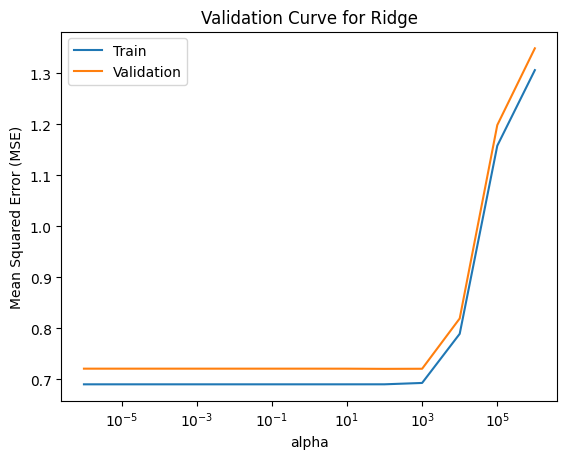

In [46]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge

# 1. Definir el modelo y el rango del hiperparámetro
modelo = Ridge()
param_name = 'alpha'
param_range = np.logspace(-6, 6, 13) # Valores de 10^-6 a 10^6

# 2. Calcular las curvas
train_scores, test_scores = validation_curve(
    modelo, X_scaled, y, 
    param_name=param_name, 
    param_range=param_range,
    cv=5, # Usa Validación Cruzada de 5 folds
    scoring='neg_mean_squared_error' # Métrica de error
)

# Calcular medias (convertir neg_mean_squared_error a positivo)
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# Graficar
plt.plot(param_range, train_scores_mean, label="Train")
plt.plot(param_range, test_scores_mean, label="Validation")
plt.xscale('log')
plt.xlabel(param_name) # Añadir etiqueta eje X
plt.ylabel('Mean Squared Error (MSE)') # Añadir etiqueta eje Y
plt.title('Validation Curve for Ridge') # Añadir título
plt.legend() # Mostrar leyenda
plt.show() # Mostrar gráfico

### Curva de Aprendizaje (Learning Curve)

* **Qué es:** Una herramienta gráfica para diagnosticar si un modelo sufre de alto sesgo o alta varianza.
* **Sirve para:** Responder a la pregunta: **"¿Conseguir más datos de entrenamiento mejorará mi modelo?"**
* **Cómo funciona:**
    1.  Se toman subconjuntos crecientes de los datos de entrenamiento (ej. 10%, 20%, ..., 100% de los datos).
    2.  Para *cada* subconjunto, se entrena el modelo (con hiperparámetros fijos).
    3.  Se mide el error en ese subconjunto (Train Score) y en el conjunto de **validación completo (Validation Score)**.
    4.  Se grafican los dos errores (Train y Validation) contra el tamaño del conjunto de entrenamiento.
* **Interpretación:**
    * **Caso 1: Modelo con Alto Sesgo (Subajuste):**
        * Las dos curvas (Train y Validation) convergen rápidamente a un **error alto**.
        * **Conclusión:** Añadir más datos **NO ayudará**. Las curvas ya se aplanaron. El modelo es demasiado simple. (Solución: aumentar complejidad, ej. usar Regresión Polinómica).
    * **Caso 2: Modelo con Alta Varianza (Sobreajuste):**
        * Hay una **gran brecha (gap)** entre el error de Train (bajo) y el de Validation (alto).
        * Las curvas *no* han convergido; la brecha se está cerrando lentamente.
        * **Conclusión:** Añadir más datos **SÍ ayudará** a que las líneas converjan y baje el error de validación. (Solución: conseguir más datos o reducir complejidad/aumentar regularización).


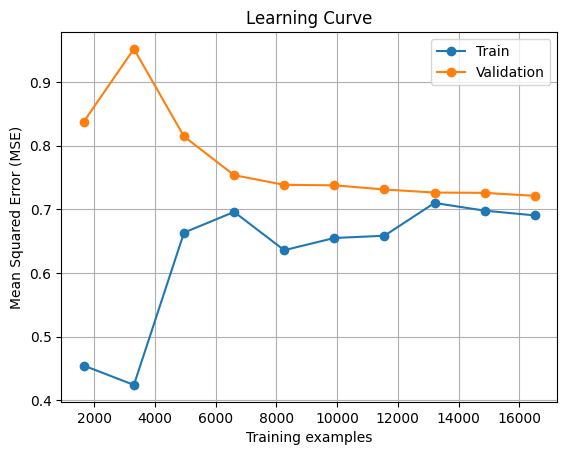

In [ ]:
from sklearn.model_selection import learning_curve

# Tamaños de muestra a probar (proporciones)
train_sizes_abs = np.linspace(0.1, 1.0, 10) # 10 pasos de 10% a 100%

train_sizes, train_scores, test_scores = learning_curve(
    modelo, X_scaled, y, 
    train_sizes=train_sizes_abs, 
    cv=5,
    scoring='neg_mean_squared_error'
)
# Calcular medias (convertir neg_mean_squared_error a positivo)
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# Graficar
plt.plot(train_sizes, train_scores_mean, 'o-', label="Train") # Usar train_sizes
plt.plot(train_sizes, test_scores_mean, 'o-', label="Validation") # Usar train_sizes
plt.xlabel("Training examples") # Añadir etiqueta eje X
plt.ylabel("Mean Squared Error (MSE)") # Añadir etiqueta eje Y
plt.title("Learning Curve") # Añadir título
plt.legend() # Mostrar leyenda
plt.grid() # Añadir rejilla puede ayudar
plt.show() # Mostrar gráfico

### Validación Cruzada (Cross-Validation)

* **Qué es:** Una técnica robusta para estimar el rendimiento (performance) de un modelo en datos nuevos, usando eficientemente los datos de entrenamiento disponibles.
* **Sirve para:** Obtener una métrica de error (ej. MSE, R²) mucho más fiable que un simple *split* de Train/Test. Se usa para comparar modelos y es el motor interno de `validation_curve` y `learning_curve`.



#### 1. Método de Reserva (Holdout Method)

* **Qué es:** El método de validación más simple. **No es Validación Cruzada**, pero es la base.
* **Cómo funciona:**
    1.  Divide aleatoriamente el conjunto de datos en dos: **Entrenamiento (Train Set)** (ej. 80%) y **Prueba (Test Set)** (ej. 20%).
    2.  El modelo se entrena **solo** con el Train Set.
    3.  El modelo se evalúa **una sola vez** con el Test Set.
* **Desventaja:** El resultado depende mucho de *cómo* se hizo la división aleatoria. Si por mala suerte en el Test Set caen todos los casos difíciles, el modelo parecerá peor de lo que es (o viceversa).


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

modelo.fit(X_train, y_train)
score = modelo.score(X_test, y_test) # Evalúa en el Test Set
print(f"Score (R²) en el Test Set: {score:.4f}")

Score (R²) en el Test Set: 0.4642


#### 2. Validación Cruzada K-Fold (K-fold Cross-validation)

* **Qué es:** El método de validación cruzada (CV) más estándar.
* **Cómo funciona:**
    1.  Divide el conjunto de datos de entrenamiento en **K** "pliegues" (folds) de igual tamaño (ej. K=5 o K=10).
    2.  Realiza **K iteraciones**:
        * **Iteración 1:** Usa el Fold 1 como **Test** y los Folds (2,3,4,5) como **Train**. Calcula el score.
        * **Iteración 2:** Usa el Fold 2 como **Test** y los Folds (1,3,4,5) como **Train**. Calcula el score.
        * ...así hasta...
        * **Iteración 5:** Usa el Fold 5 como **Test** y los Folds (1,2,3,4) como **Train**. Calcula el score.
    3.  El resultado final es la **media** (y la desviación estándar) de los K scores obtenidos. 
* **Ventaja:** Todos los datos se han usado tanto para entrenar como para probar (en diferentes iteraciones), dando una estimación mucho más estable y fiable del rendimiento del modelo.


In [49]:
from sklearn.model_selection import cross_val_score

# modelo = El modelo que quieres evaluar (ej. Ridge(alpha=1.0))
# cv=5 significa K=5 folds

# cross_val_score entrena y evalúa K veces automáticamente
scores = cross_val_score(
    modelo, X_scaled, y, cv=5, scoring='neg_mean_squared_error'
)

print(f"MSE en cada fold: {-scores}")
print(f"MSE promedio (CV): {-scores.mean():.4f}")
print(f"Std Dev (CV): {scores.std():.4f}")

MSE en cada fold: [0.61501736 0.73793502 0.76568135 0.80908574 0.67725803]
MSE promedio (CV): 0.7210
Std Dev (CV): 0.0681


#### 3. Validación Cruzada K-Fold Estratificada (Stratified K-fold)

* **Qué es:** Una variante de K-Fold usada **específicamente para problemas de CLASIFICACIÓN**.
* **Problema que resuelve:** En K-Fold normal, si una clase es muy rara (ej. 5% de los datos son "Fraude"), una división aleatoria podría crear un Fold de Test que no contenga *ningún* ejemplo de esa clase rara, haciendo la validación inútil.
* **Cómo funciona:** Asegura que la división en K folds **mantiene la proporción original de las clases** en cada fold. Si el dataset total tiene 80% Clase A y 20% Clase B, cada uno de los K folds tendrá (aproximadamente) 80% de A y 20% de B.

In [53]:
from sklearn.model_selection import KFold

X_np = X.to_numpy() if isinstance(X, pd.DataFrame) else X
y_np = y.to_numpy() if isinstance(y, pd.Series) else y

kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []

# 'y_np' no se usa en split() para KFold estándar, solo se pasa X
for fold, (train_index, test_index) in enumerate(kf.split(X_np)):
    X_train_fold, X_test_fold = X_np[train_index], X_np[test_index]
    y_train_fold, y_test_fold = y_np[train_index], y_np[test_index]
    print(f"Fold {fold+1}: Train size={len(train_index)}, Test size={len(test_index)}")


Fold 1: Train size=16512, Test size=4128
Fold 2: Train size=16512, Test size=4128
Fold 3: Train size=16512, Test size=4128
Fold 4: Train size=16512, Test size=4128
Fold 5: Train size=16512, Test size=4128
